In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from scipy.optimize import curve_fit
from math import exp

# Extracellular metabolomics

In [2]:
def plot_met(met, metab_table, ax):
    metab = metab_table
    for cond in ['pH4.5', 'pH5', 'pH5.5', 'pH6.5']:
        temp_pd = (metab[metab['Sample']==cond]).reset_index().drop(['index'],axis=1)
        if cond == 'pH4.5':
            avg = list(temp_pd[met+'(avg)'])[1:5] + list(temp_pd[met+'(avg)'])[-2:]
            std = list(temp_pd[met+'(std)'])[1:5] + list(temp_pd[met+'(std)'])[-2:]
            Time = list(temp_pd['Time'])[1:5] + list(temp_pd['Time'])[-2:]
            ax.errorbar(Time, avg, yerr= std,linestyle='dotted', elinewidth=2, label=cond )
            ax.scatter(Time,avg, s=20)
        else:
            avg, std = temp_pd[met+'(avg)'], temp_pd[met+'(std)']
            ax.errorbar(temp_pd['Time'],avg, yerr= std,linestyle='dotted', elinewidth=2, label=cond )
            ax.scatter(temp_pd['Time'],avg, s=20)
    ax.set_ylabel(met+'(mM)')
    ax.set_xlabel('Time(hr)')
    ax.legend()
    ax.grid()

In [25]:
metab = pd.read_csv('../data/Exp_data/Metabolomics_mM.csv')

# Intracellular metabolomics

In [ ]:
intra_metab = pd.read_csv('../data/Exp_data/IntraMetabolomics.csv')
temp_samples = []
for sample in list(intra_metab['Sample']):
    if sample == 'Free':
        temp_samples.append('Uncontrolled')
    else:
        temp_samples.append('pH='+str(sample) )    
intra_metab['Sample'] = temp_samples
intra_metabolites = ['3-Phosphoglyceric acid','Phosphoenolpyruvate','Pyruvic acid',
                     'Lactic acid','Acetic acid','Formic acid' ]

/home/bras5181/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


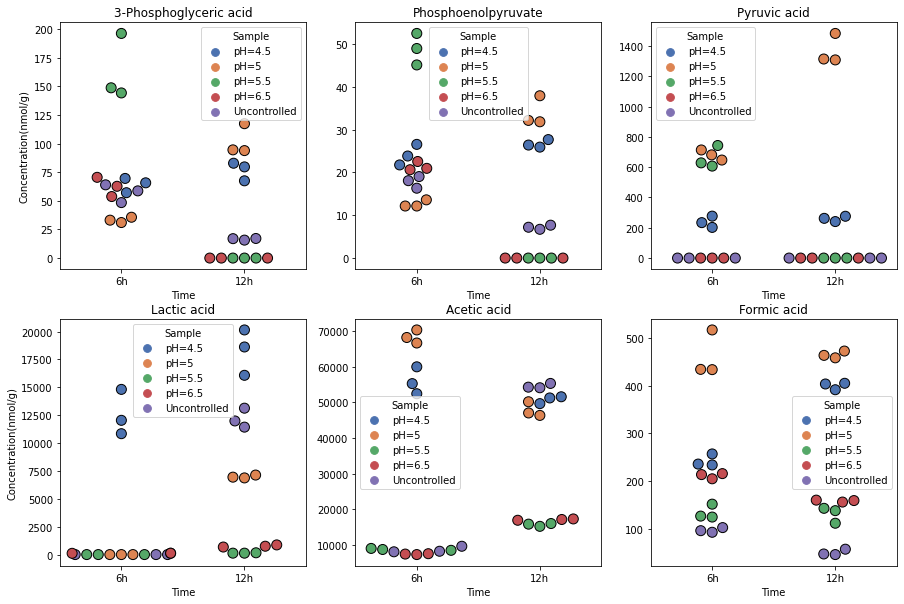

In [29]:
fig, axs = plt.subplots(2,3,figsize=(15,10))
for i in range(len(intra_metabolites)):
    met = intra_metabolites[i]
    x, y = int(i/3), int(i%3)
    sns.swarmplot(data=intra_metab,x='Time',y=met,hue='Sample',
                  size=10,edgecolor='black', linewidth=1,palette="deep",ax=axs[x][y])
    axs[x][y].set_title(met)
    if y==0:
        axs[x][y].set_ylabel('Concentration(nmol/g)')
    else:
        axs[x][y].set_ylabel('')
plt.savefig('../../../../EPS_LP/Figures/intra_metab_plots.svg',format='svg',dpi=150)